In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
dfx=pd.read_csv('Diabetes_XTrain.csv')
dfy=pd.read_csv('Diabetes_YTrain.csv')


In [19]:
print(dfx.shape)
print(dfy.shape)

(576, 8)
(576, 1)


In [26]:
dfx.head(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23
5,7,100,0,0,0,30.0,0.484,32
6,4,110,66,0,0,31.9,0.471,29
7,1,111,86,19,0,30.1,0.143,23
8,3,169,74,19,125,29.9,0.268,31
9,1,71,62,0,0,21.8,0.416,26


In [20]:
X=dfx.values
Y=dfy.values.reshape(-1,)

In [32]:
print(X.shape)
print(Y.shape)
print(X[0])

(576, 8)
(576,)
[  7.    168.     88.     42.    321.     38.2     0.787  40.   ]


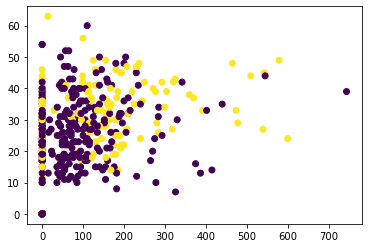

In [39]:
plt.scatter(X[:,4],X[:,3],c=Y)
plt.show()

In [40]:
def distance(x1,x2):
    return np.sqrt((sum((x1-x2)**2)))

def knn(X,Y,quarry_x,k=5):
    vals=[]
    m=X.shape[0]
   # print(m)
    
    for i in range(m):
        d=distance(quarry_x,X[i])
        vals.append((d,Y[i]))
    
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
   # print(new_vals)
    freq=new_vals[1].argmax()
    #vals=np.array(vals)
    prediction=new_vals[0][freq]
    return prediction
   

In [ ]:
ans=knn(X,Y,quarry_x)
print(int(ans))

In [41]:
df3=pd.read_csv('Diabetes_Xtest.csv')

In [43]:
df3.head(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22
5,5,137,108,0,0,48.8,0.227,37
6,1,153,82,42,485,40.6,0.687,23
7,6,98,58,33,190,34.0,0.430,43
8,2,92,62,28,0,31.6,0.130,24
9,3,111,56,39,0,30.1,0.557,30


In [44]:
quarry_x=df3.values

In [45]:
quarry_x[1]

array([  2.   ,  93.   ,  64.   ,  32.   , 160.   ,  38.   ,   0.674,
        23.   ])

In [46]:
for i in range(len(quarry_x)):
    ans=knn(X,Y,quarry_x[i])
    print(int(ans))

1
0
0
0
0
1
1
1
0
1
1
0
1
0
0
0
0
1
1
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
1
1
0
1
0
0
0
1
0
0
1
0
1
0
1
0
0
1
1
1
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
1
1
0
0
1
1
0
0
0
0
1
1
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
1
1
1
0
1
0
0
0
0
1
0
0
0
1
1
0
0
1
1
1
1
0
0
0
1
1
0
0
1
0
0
1
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
1
0
1
0
1
1
0


In [50]:
with open("prediction.csv","a") as f:
    for i in range(len(quarry_x)):
        ans=knn(X,Y,quarry_x[i])
        ans=str(int(ans))
        f.write(ans)
        f.write('\n')